# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

## Load the dataset

In [2]:
df = pd.read_csv("ted.csv")
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   object
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   object
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [5]:
for col in df.columns:
    print("{}: {}".format(col ,df[col].unique().shape[0]))

comments: 559
description: 2550
duration: 1083
event: 355
film_date: 735
languages: 66
main_speaker: 2156
name: 2550
num_speaker: 5
published_date: 2490
ratings: 2550
related_talks: 2550
speaker_occupation: 1459
tags: 2530
title: 2550
url: 2550
views: 2550


## Data cleaning:

In [4]:
for col in df.columns:
    print("{}: {}".format(col ,df[col].isnull().sum()))

comments: 0
description: 0
duration: 0
event: 0
film_date: 0
languages: 0
main_speaker: 0
name: 0
num_speaker: 0
published_date: 0
ratings: 0
related_talks: 0
speaker_occupation: 6
tags: 0
title: 0
url: 0
views: 0


## Using regex to extract year of the talk from the event's name

In [6]:
df["event"].value_counts()[:70]

TED2014                 84
TED2009                 83
TED2013                 77
TED2016                 77
TED2015                 75
                        ..
TEDMED 2015              8
TEDxCERN                 7
TEDxWomen 2011           7
TEDYouth 2014            7
TEDSalon London 2010     7
Name: event, Length: 70, dtype: int64

In [7]:
def extract_year(s):
    s = str(s).strip()
    pattern = r"[0-9]{4}$"
    ls = re.findall(pattern, s)
    if len(ls) > 0:
        return ls[0]
    else:
        return np.nan

In [8]:
df["year"] = df["event"].apply(extract_year)

In [9]:
df["year"].value_counts()
df["year"].isnull().sum()

734

Quite a lot of events whose name doesn't contain the year number

In [10]:
df[["comments", "num_speaker"]].groupby("num_speaker").mean().sort_values(by = "comments", ascending = False)

,comments
num_speaker,
1,192.990770
2,140.755102
4,90.333333
3,75.400000
5,6.000000


In [11]:
df["num_speaker"].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

### Explore the distribution of comments, duration and views

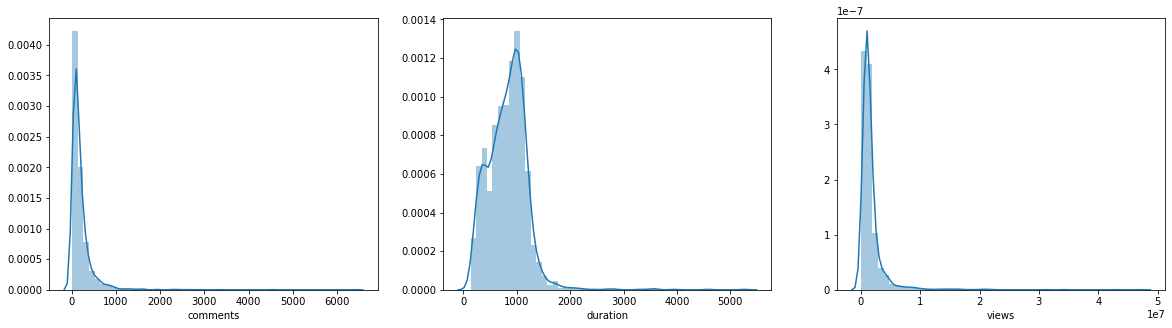

In [12]:
fig, axs = plt.subplots(figsize=(20,5), ncols=3)

for idx, col in enumerate(["comments", "duration", "views"]):
    sns.distplot(df[col], ax = axs[idx])
    

#### Views

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64


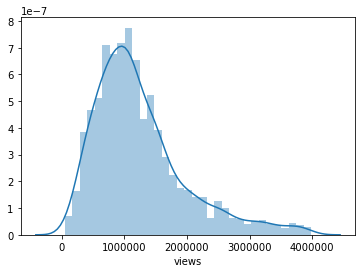

In [15]:
print(df["views"].describe())
sns.distplot(df[df["views"] < 0.4e7]["views"])

In [13]:
df[['title', 'main_speaker', 'views']].sort_values('views', ascending=False)[:30]

,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1346,Your body language may shape who you are,Amy Cuddy,43155405
677,How great leaders inspire action,Simon Sinek,34309432
837,The power of vulnerability,Brené Brown,31168150
452,10 things you didn't know about orgasm,Mary Roach,22270883
1776,How to speak so that people want to listen,Julian Treasure,21594632
201,My stroke of insight,Jill Bolte Taylor,21190883
5,Why we do what we do,Tony Robbins,20685401
2114,This is what happens when you reply to spam email,James Veitch,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465


#### Speaker with the most views: Mr.Ken Robinson

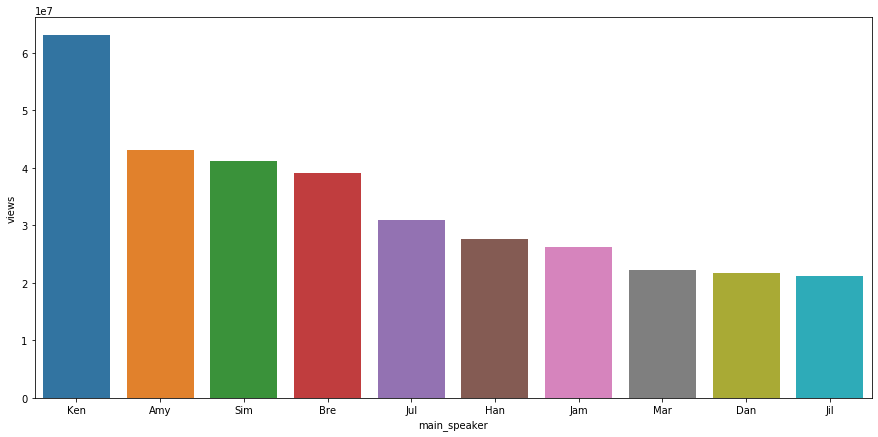

In [14]:
mainS = df[["main_speaker", "views", "comments"]].groupby("main_speaker").sum().sort_values(by = "views", ascending = False)[:10].reset_index()
mainS["main_speaker"] = mainS["main_speaker"].apply(lambda x: x[:3])
plt.figure(figsize=(15,7))
sns.barplot(x='main_speaker', y='views', data=mainS)

#### Comments

In [16]:
df[["comments", "main_speaker", "title", "views"]].sort_values(by = "comments", ascending = False)[:15]

,comments,main_speaker,title,views
96,6404,Richard Dawkins,Militant atheism,4374792
0,4553,Ken Robinson,Do schools kill creativity?,47227110
644,3356,Sam Harris,Science can answer moral questions,3433437
201,2877,Jill Bolte Taylor,My stroke of insight,21190883
1787,2673,David Chalmers,How do you explain consciousness?,2162764
954,2492,Janet Echelman,Taking imagination seriously,1832930
840,2374,Lesley Hazleton,On reading the Koran,1847256
1346,2290,Amy Cuddy,Your body language may shape who you are,43155405
661,2272,Michael Specter,The danger of science denial,1838628
677,1930,Simon Sinek,How great leaders inspire action,34309432


count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64


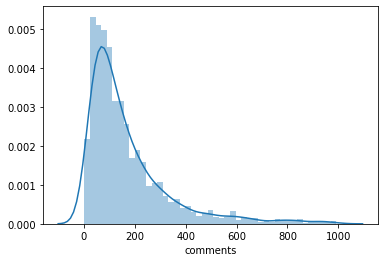

In [17]:
print(df["comments"].describe())
sns.distplot(df[df["comments"] < 1000]["comments"])

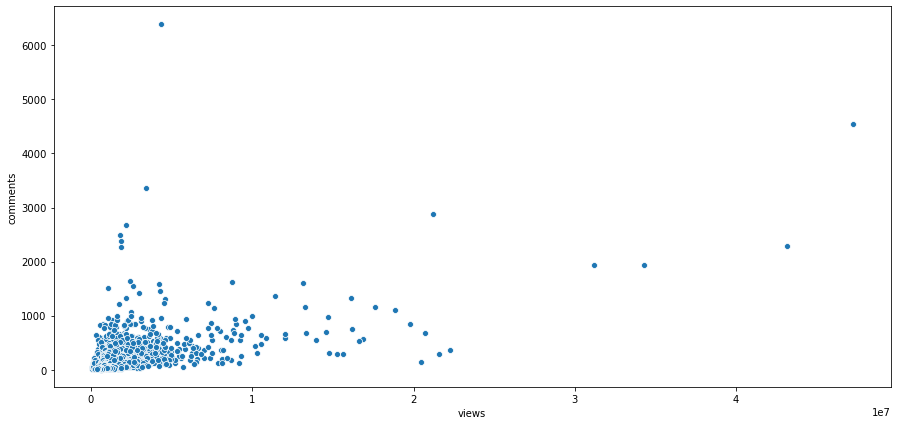

In [18]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = "views", y = "comments", data = df)

## Correlation map

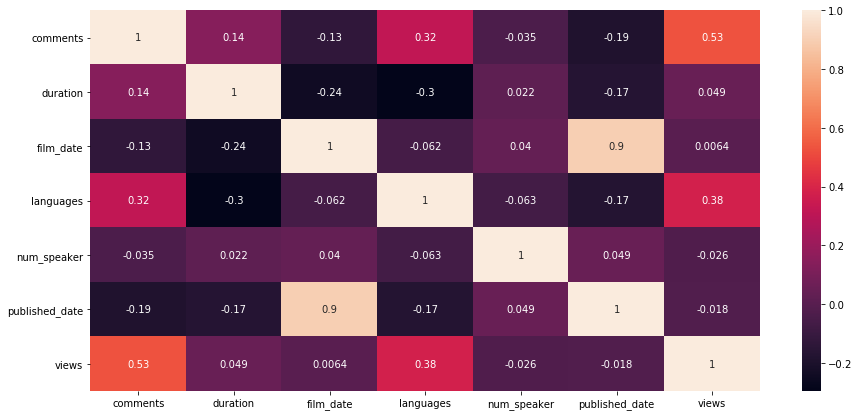

In [20]:
int_col = df.columns.to_series().groupby(df.dtypes).groups
int_col = {k.name:v for k, v in int_col.items()}
corr_map = df[int_col["int64"].values].corr()
plt.figure(figsize=(15,7))

sns.heatmap(corr_map, annot = True)

#### Insights:
- Duration has a small but still noticeable negative correlation to film_date and publish_date showed a trend that along with time, the duration of the TED talks tends to decrease, although not to significantly
- The number of languages translated of a speech is correlated to views, comments and duration in a sense that more speech translated to many languages tends to be better in many ways, more globally important and can be understood by more people around the globe and therefore, attracts more views and comments.
- On the other hand, speeches with shorter duration are more likely to be translated to many languages, may be to keep it concise and informative
- Number of views also show a significant correlation with number of comments. It seems that speeches with more views tend to receive more comments

## Extract time information

In [21]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [22]:
def convert2year(s):
    s = str(s).split("-")[-1]
    return s
df["year"] = df['published_date'].apply(convert2year)

In [23]:
df["year"].isnull().sum()

0

In [24]:
from datetime import datetime
def month_name(s):
    s = datetime.strptime(s, "%d-%m-%Y")
    print(s)
    return s.strftime("%b")


In [ ]:
df["film_month"] = df["film_date"].apply(month_name)


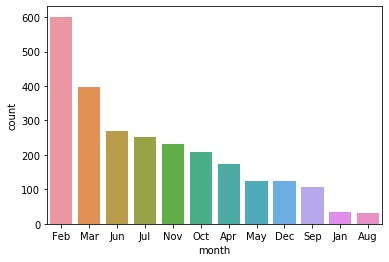

In [26]:
film_df = pd.DataFrame(df["film_month"].value_counts()).reset_index()
film_df.rename(columns = {"index": "month", "film_month": "count"}, inplace = True)
sns.barplot("month", "count", data = film_df)

In [27]:
df[["year", "views", "comments"]].groupby("year").mean().sort_values(by = "views", ascending = False)

,views,comments
year,,
2006,4.130967e+06,363.420000
2013,2.234803e+06,288.663934
2015,1.911760e+06,118.031818
2014,1.856316e+06,158.691667
2016,1.704276e+06,81.308642
2012,1.600203e+06,209.339869
2010,1.566904e+06,315.000000
2009,1.540809e+06,198.666667
2011,1.534482e+06,247.226054


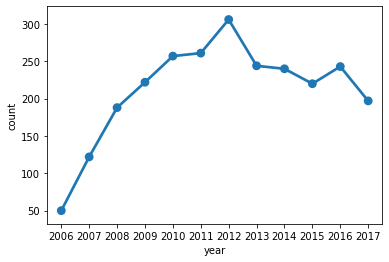

In [28]:
year_df = pd.DataFrame(df["year"].value_counts().reset_index())
year_df.rename(columns = {"index" : "year", "year": "count"}, inplace = True)

sns.pointplot(x = "year", y = "count", data = year_df)

##### the number of speech peaked at 2012

In [29]:
df["year"].unique()

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'], dtype=object)

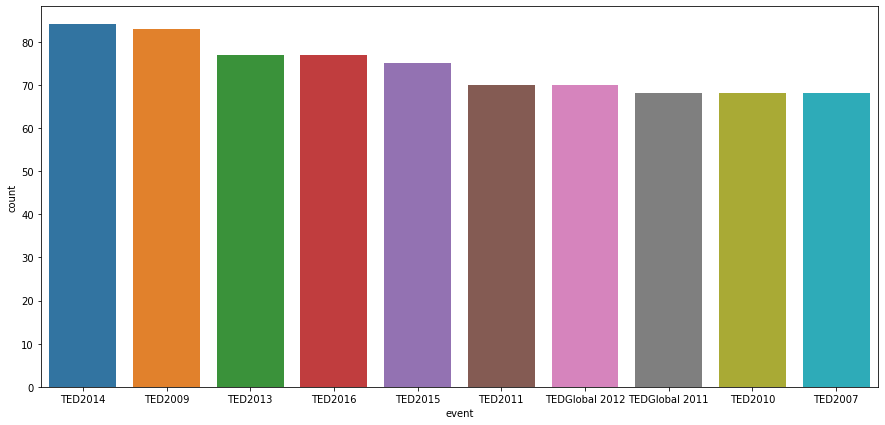

In [30]:
event_df = pd.DataFrame(df["event"].value_counts().reset_index())[:10]
event_df.rename(columns = {"event": "count", "index" : "event"}, inplace = True)
plt.figure(figsize=(15,7))

sns.barplot("event", "count", data = event_df)

## Rating analysis

In [33]:
rating_emo = []


In [34]:
for val in df["ratings"].values:
    val = val[1:-1]
    nval = re.sub(r"},", "};", val)
    nval = nval.split(";")
#     print(nval)
    for rate in nval:
        nameP = r"\'([A-Za-z]+)\'"
        rating_emo.append(re.findall(nameP, rate)[2])
    


In [35]:
rating_emo = list(set(rating_emo))

In [36]:
rating_emo

['Fascinating',
 'Persuasive',
 'Courageous',
 'Ingenious',
 'count',
 'Informative',
 'Longwinded',
 'Beautiful',
 'Confusing',
 'Unconvincing',
 'Inspiring',
 'Obnoxious',
 'Funny',
 'OK']

In [37]:
def get_count(s, emo):
    s = eval(s)
    count = 0
    for val in s:
        if val["name"] == emo:
            count = val["count"]
    return count
    
        
        

In [38]:

for emo in rating_emo:
    df[emo] = emo
    df[emo] = df.apply(lambda x: get_count(x["ratings"], emo), axis=1)
    

In [39]:
# df.to_csv("new_ted.csv", index = False)

In [40]:
df.drop(["ratings"], axis = 1, inplace = True)

In [41]:
df.drop(["count"], axis = 1, inplace = True)

In [42]:
tags = []

In [43]:
import ast
for tag in df["tags"]:
    tag = ast.literal_eval(tag)
    tags.append(tag)

In [44]:
tags = [tag for k in tags for tag in k]

In [45]:
tags = list(set(tags))

In [46]:
len(tags)

416

In [47]:
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))


In [48]:
tag = df.apply(lambda x: pd.Series(x["tags"]), axis = 1).stack().reset_index(level = 1, drop = True)
tag

0             children
0           creativity
0              culture
0                dance
0            education
             ...      
2549              play
2549     public spaces
2549           society
2549          software
2549    urban planning
Length: 19154, dtype: object

In [49]:
tag.name = "tag"

In [50]:
df_s = pd.concat([df, tag], axis = 1)
df_s.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Informative,Longwinded,Beautiful,Confusing,Unconvincing,Inspiring,Obnoxious,Funny,OK,tag
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,7346,387,4573,242,300,24924,209,19645,1174,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,7346,387,4573,242,300,24924,209,19645,1174,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,7346,387,4573,242,300,24924,209,19645,1174,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,7346,387,4573,242,300,24924,209,19645,1174,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,7346,387,4573,242,300,24924,209,19645,1174,education


## Analyzing TED talks topics

In [54]:
tag_df = pd.DataFrame(df_s["tag"].value_counts().reset_index())
tag_df.rename(columns = {"index": "tag", "tag": "count"}, inplace = True)
tag_df.head()

,tag,count
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450


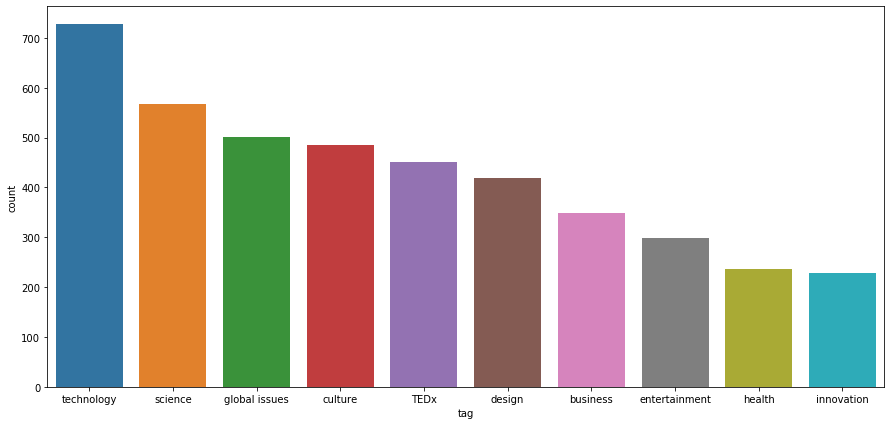

In [57]:
plt.figure(figsize = (15, 7))
sns.barplot("tag", "count", data = tag_df.iloc[:10])

In [106]:
# top_10_tag = df_s[df_s["tag"].isin(tagL)]
# plt.figure(figsize = (15, 7))
# g = sns.FacetGrid(col = "tag")
# sns.pointplot(x = "year", y = "tag", data = top_10_tag)

In [96]:
tagL = tag_df.iloc[:10]["tag"].values
tagL

array(['technology', 'science', 'global issues', 'culture', 'TEDx',
       'design', 'business', 'entertainment', 'health', 'innovation'],
      dtype=object)

(0, 8000000.0)

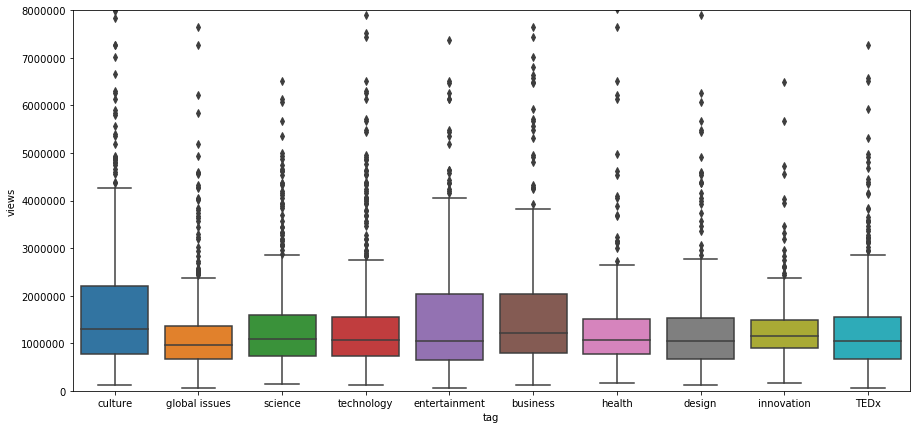

In [104]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot("tag", "views", data = df_s[df_s["tag"].isin(tagL)])
ax.set_ylim([0, 0.8e7])


In [59]:
df_s.drop("tags", axis = 1 , inplace = True)

## Speaker occupation analysis

In [67]:
speaker_df = pd.DataFrame(df_s["speaker_occupation"].value_counts().reset_index())
speaker_df.rename(columns = {"index": "occupation", "speaker_occupation": "count"}, inplace = True)
speaker_df.head()

,occupation,count
0,Writer,295
1,Entrepreneur,249
2,Artist,248
3,Journalist,233
4,Architect,217


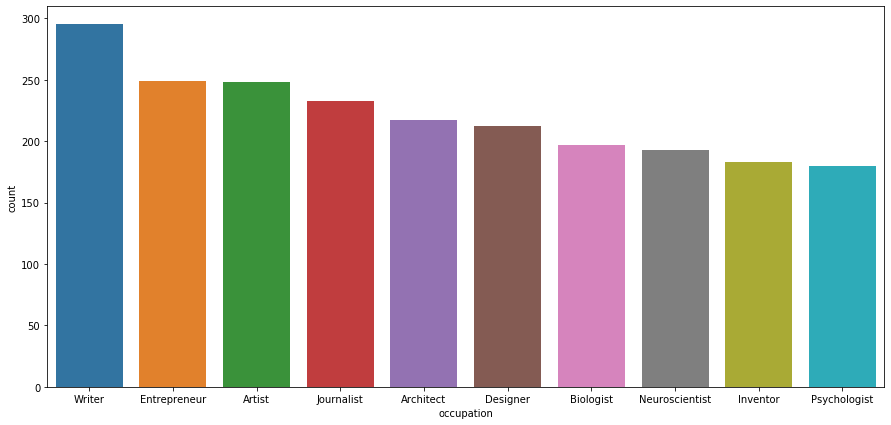

In [68]:
plt.figure(figsize = (15, 7))
sns.barplot("occupation", "count", data = speaker_df.iloc[:10])

In [91]:
occ = speaker_df.iloc[:10]["occupation"].values


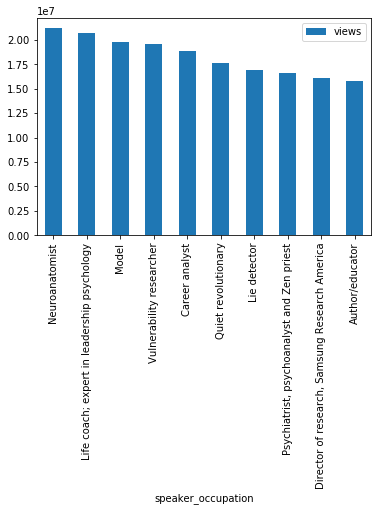

In [84]:
df[["speaker_occupation", "views"]].groupby("speaker_occupation").mean().sort_values(by = "views", ascending= False)[:10].plot(kind = "bar")

(0, 8000000.0)

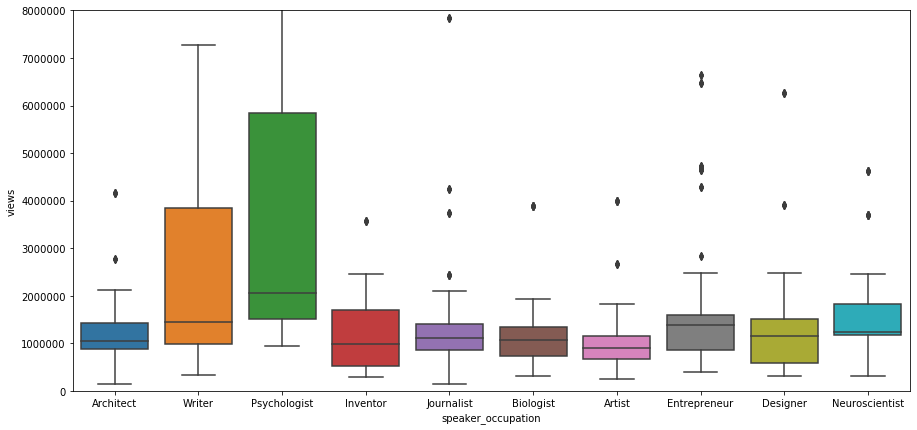

In [103]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot("speaker_occupation", "views", data = df_s[df_s["speaker_occupation"].isin(occ)])
ax.set_ylim([0, 0.8e7])


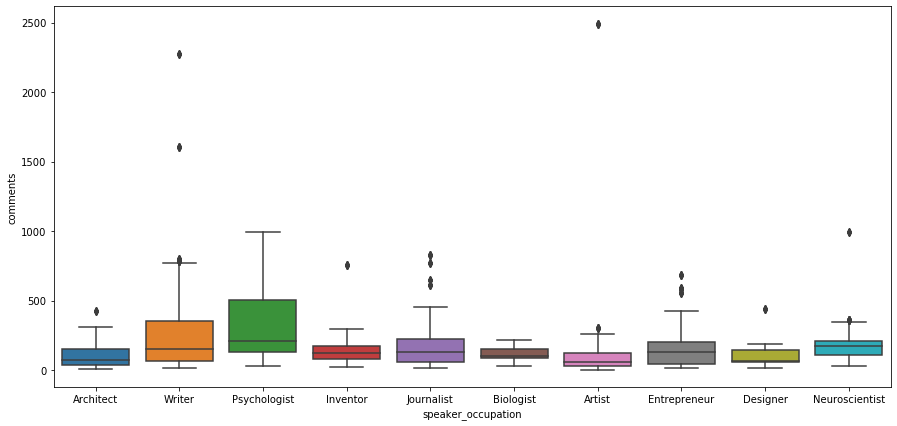

In [95]:
plt.figure(figsize = (15, 7))
sns.boxplot("speaker_occupation", "comments", data = df_s[df_s["speaker_occupation"].isin(occ)])

## Language distribution

In [107]:
df_s["languages"].value_counts()

23    1178
26    1147
27    1015
29    1004
24     995
      ... 
64       4
55       4
59       3
69       3
72       2
Name: languages, Length: 66, dtype: int64

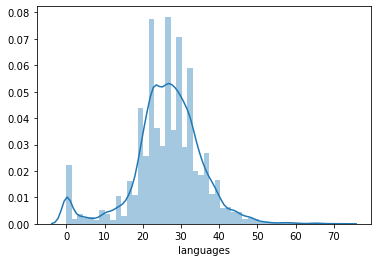

In [109]:
sns.distplot(df_s["languages"])

<Figure size 1440x720 with 0 Axes>

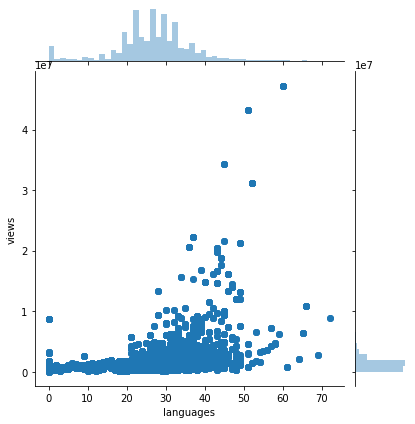

In [112]:
plt.figure(figsize = (20,  10))
sns.jointplot("languages", "views", data = df_s)

#of languages do have some correlation with #of views <br>
looks like the speech that was translated to more languages means that it may receive more views